In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Flatten, Dense, Input, ReLU

In [3]:
path_to_dataset = '../dataset/'
PATH = os.path.join(os.path.dirname(path_to_dataset))
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

num_classes = 2
BATCH_SIZE = 32
IMG_SIZE = (64, 64)

In [5]:
# Train dataset 
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             seed=123,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 782 files belonging to 2 classes.


In [6]:
# Validation dataset
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  seed=123,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)


Found 220 files belonging to 2 classes.


In [7]:
# Model - Keep it simple
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(8, activation=tf.nn.relu),
        tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
    ])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                196624    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 196,778
Trainable params: 196,778
Non-trainable params: 0
_________________________________________________________________


In [9]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

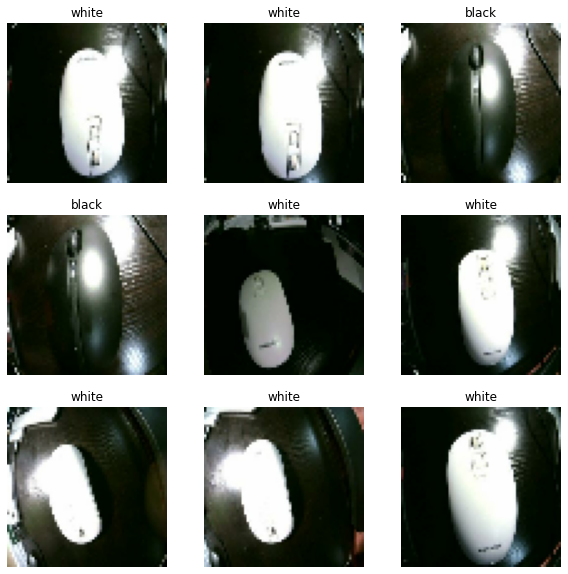

In [11]:
# Visualize the dataset 
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [12]:
# Hyperparameter 
base_learning_rate = 0.001
initial_epochs = 100

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
# Evaluate model before training 
loss0, accuracy0 = model.evaluate(validation_dataset)

6/6 [==============================] - 0s 2ms/step - loss: 10.9454 - accuracy: 0.6649


In [14]:
# Train model 
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 9.5503 - accuracy: 0.8900 - val_loss: 1.0815 - val_accuracy: 0.9787
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.9949 - val_loss: 0.3904 - val_accuracy: 0.9894
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4415 - accuracy: 0.9962 - val_loss: 0.9462 - val_accuracy: 0.9628
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5945 - accuracy: 0.9898 - val_loss: 9.0216 - val_accuracy: 0.8883
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2603 - accuracy: 0.9923 - val_loss: 2.4177 - val_accuracy: 0.9628
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.7581 - val_accuracy: 0.9574
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.3303 - val_accuracy: 0.9574
Epoch

25/25 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.5735 - val_accuracy: 0.9628
Epoch 58/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.3398 - val_accuracy: 0.9574
Epoch 59/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.2420 - val_accuracy: 0.9574
Epoch 60/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.9084 - val_accuracy: 0.9681
Epoch 61/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.6303 - val_accuracy: 0.9628
Epoch 62/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.9132 - val_accuracy: 0.9628
Epoch 63/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1974 - val_accuracy

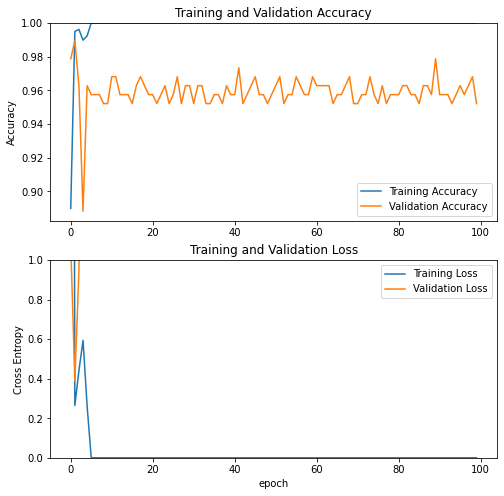

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
# Further finetuning
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 100/110
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.8216 - val_accuracy: 0.9574
Epoch 101/110
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.1095 - val_accuracy: 0.9574
Epoch 102/110
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.5879 - val_accuracy: 0.9521
Epoch 103/110
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.5879 - val_accuracy: 0.9521
Epoch 104/110
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.8216 - val_accuracy: 0.9574
Epoch 105/110
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.2172 - val_accuracy: 0.9681
Epoch 106/110
25/25 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3

In [18]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

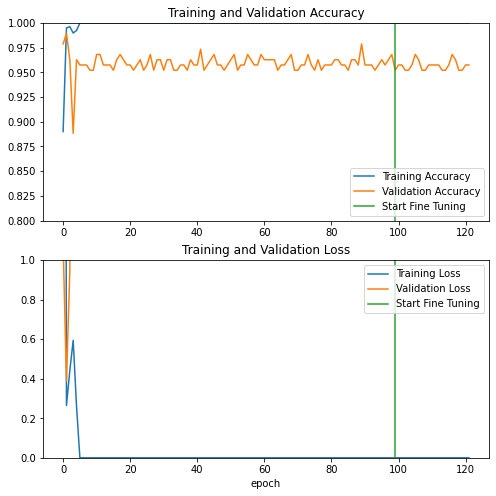

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [20]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 51ms/step - loss: 2.0930 - accuracy: 0.9688
Test accuracy : 0.96875


Predictions:
 [1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1]
Labels:
 [1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1]


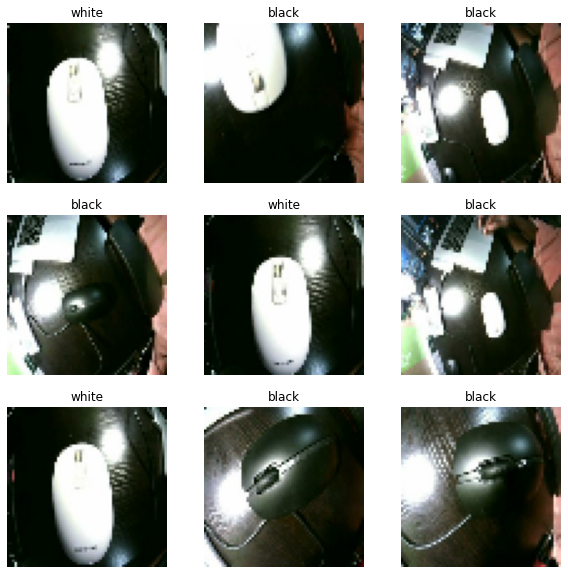

In [21]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a argmax to our model
predictions = tf.math.argmax(predictions, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch
     )

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

In [22]:
#To quantize the input and output tensors, and make the converter throw an error if it encounters an 
# operation it cannot quantize, convert the model again with some additional parameters

def representative_dataset():
    for _ in range(100):
        data = np.random.rand(1, IMG_SIZE[0], IMG_SIZE[1], 3)
        yield [data.astype(np.float32)]

In [ ]:
# Save model 
model.save('mouse_model.h5')

In [ ]:
# Load saved model 
model=tf.keras.models.load_model("mouse_model.h5")

# Apply model compression -  integer-only quantization¶
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

In [ ]:
# Save quantized model 
open("mouse_quantized.tflite", "wb").write(tflite_quant_model)

# Remove models

In [ ]:
rm -rf mouse_quantized.tflite

In [ ]:
rm -rf mouse_model.h5

# Future works

- Apply data augmentation
- Hyperparameter tuning 
- Use MobileNetv1 and MobileNetv2
- Evaluate the impact of quantization on accuracy